## 模型1: 固定风险，优化收益

In [15]:
import numpy as np
import pandas as pd
import gurobipy as gp
from gurobipy import GRB

- s：资产
- x：投资$s_i$资金数量
- r：平均收益
- q：风险损失率
- p：交易费费率
- u：投资阈值

In [16]:
s, r, q, p, u = gp.multidict(
    {
        "s0": [0.05, 0, 0, 0],
        "s1": [0.28, 0.025, 0.01, 103],
        "s2": [0.21, 0.015, 0.02, 198],
        "s3": [0.23, 0.055, 0.045, 52],
        "s4": [0.25, 0.026, 0.065, 40],
    }
)

In [17]:
# M：总投资
M = 10000

In [18]:
m = gp.Model("模型1")

In [19]:
x = m.addVars(s, name="x")

In [20]:
obj_coef = {i: r[i] - p[i] for i in s}
m.setObjective(x.prod(obj_coef), sense=GRB.MAXIMIZE)

In [21]:
obj_coef

{'s0': 0.05, 's1': 0.27, 's2': 0.19, 's3': 0.185, 's4': 0.185}

In [22]:
con1_coef = {i: p[i] + 1 for i in s}

In [23]:
m.addConstr(x.prod(con1_coef) == M, name="总投资限制")

<gurobi.Constr *Awaiting Model Update*>

In [24]:
results = []
for a in np.arange(0, 0.05, 0.001):
    for constr in m.getConstrs():
        if constr.ConstrName != "总投资限制":
            m.remove(constr)
    m.addConstrs((x[i] * q[i] <= a * M for i in s), name="最大风险限制")
    m.optimize()
    result = [x[i].X for i in s]
    result.append(a)
    result.append(m.ObjVal)
    results.append(result)

Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (mac64[arm] - Darwin 23.4.0 23E224)

CPU model: Apple M1 Pro
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 6 rows, 5 columns and 9 nonzeros
Model fingerprint: 0x74d7cbad
Coefficient statistics:
  Matrix range     [1e-02, 1e+00]
  Objective range  [5e-02, 3e-01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+04, 1e+04]
Presolve removed 6 rows and 5 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.0000000e+02   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.00 seconds (0.00 work units)
Optimal objective  5.000000000e+02
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (mac64[arm] - Darwin 23.4.0 23E224)

CPU model: Apple M1 Pro
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 6 rows, 5 columns and 9 nonzeros
Model 

In [25]:
m.write("part1.lp")

对a变量以步长0.001进行循环，计算不同a下模型的结果

In [26]:
results_df = pd.DataFrame(results)
results_df.columns = ["s0", "s1", "s2", "s3", "s4", "a", "Q"]
results_df.head()

,s0,s1,s2,s3,s4,a,Q
0,10000.000000,0.0,0.000000,0.000000,0.000000,0.000,500.000000
1,8316.384615,400.0,666.666667,181.818182,384.615385,0.001,755.276107
2,6632.769231,800.0,1333.333333,363.636364,769.230769,0.002,1010.552214
3,4949.153846,1200.0,2000.000000,545.454545,1153.846154,0.003,1265.828322
4,3265.538462,1600.0,2666.666667,727.272727,1538.461538,0.004,1521.104429


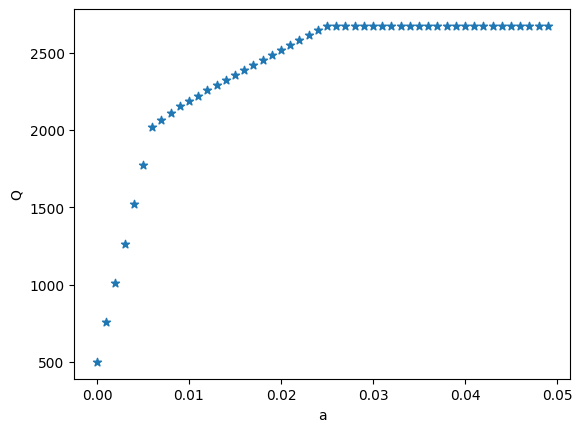

In [27]:
import matplotlib.pyplot as plt

plt.scatter(results_df["a"], results_df["Q"], marker="*")
plt.xlabel("a")
plt.ylabel("Q")
plt.show()